**Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): \
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], \
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].**

**1. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.\
2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).\
3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**


In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Построим график и посмотри есть ли между двумя наборами данных линейная зависимость:

<function matplotlib.pyplot.show(close=None, block=None)>

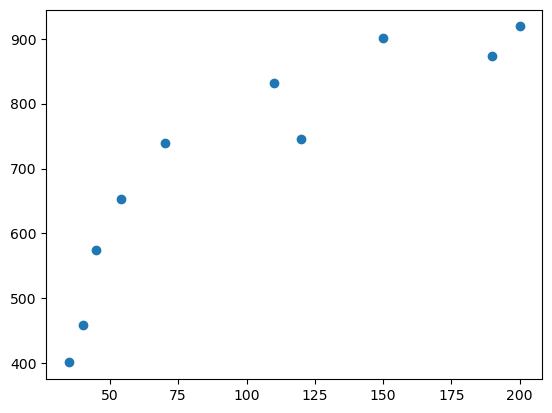

In [6]:
plt.scatter(x,y)
plt.show

По графику видно, что присутствует линеная зависимость. Теперь подсчитаем коэффициенты линейной регрессии. Сначала с интерсепт. 

In [9]:
b1 = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
b0 = np.mean(y) - b1*np.mean(x)
print(f'b1 = {b1: .4f}')
print(f'b0 = {b0: .4f}')
print(f'Готовая модель: y = {b0: .4f} + {b1: .4f} * x')

b1 =  2.6205
b0 =  444.1774
Готовая модель: y =  444.1774 +  2.6205 * x


Теперь подсчитаем коэффициенты без интерсепт, т.е. только b1

In [12]:
b = np.mean(x*y) / np.mean(x**2)
print(f'b = {b: .4f}')
print(f'Готовая модель: y = {b: .4f} * x')

b =  5.8898
Готовая модель: y =  5.8898 * x


Отобразим обе модели на графике

<function matplotlib.pyplot.show(close=None, block=None)>

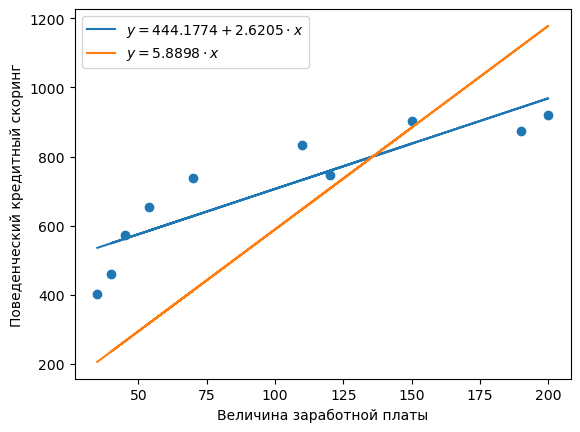

In [19]:
plt.scatter(x,y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.plot(x, b0 + b1* x, label='$y=444.1774+2.6205\cdot x$')
plt.plot(x, b*x, label='$y=5.8898\cdot x$')
plt.legend()
plt.show

Эти же коэффициенты можно рассчитать с помощью градиентного спуска.\
Для этого будем использовать среднюю квадратичную ошибку (функцию потерь). Сначала рассчитаем коэффициенты без интерсепт:

In [38]:
def mse_(B, y=y, x=x, n=len(x)):
    return np.sum((B*x - y)**2) / n

alpha = 1e-6  # задаем скорость обучения
# находим производную по B: mse'=(2 / n) * np.sum((B * x - y) * x)

B = 0.1  # задаем начальное значение для коэффициента
n = len(x)

for i in range(5000):
    B -= alpha * (2 / n) * np.sum((B * x - y) * x)
    if i % 500 == 0:
        print(f'I = {i}, B = {B}, mse={mse_(B)}')

I = 0, B = 0.25952808, mse=493237.7212546963
I = 500, B = 5.889815595583751, mse=56516.858416040064
I = 1000, B = 5.8898204201285544, mse=56516.85841571941
I = 1500, B = 5.889820420132673, mse=56516.85841571943
I = 2000, B = 5.889820420132673, mse=56516.85841571943
I = 2500, B = 5.889820420132673, mse=56516.85841571943
I = 3000, B = 5.889820420132673, mse=56516.85841571943
I = 3500, B = 5.889820420132673, mse=56516.85841571943
I = 4000, B = 5.889820420132673, mse=56516.85841571943
I = 4500, B = 5.889820420132673, mse=56516.85841571943


Получили коэффициент 5.8898. Модель принимает вид y = 5.8898 * x

Теперь рассчитаем коэффициенты с интерсепт.

In [57]:
def mse_(B0, B1, y=y, x=x, n=len(x)):
    return np.sum((B0 + B1*x - y)**2) / n

# находим производную по B0: mse' = (2/n) * np.sum((B0 + B1*x - y))
# находим производную по B1: mse' = (2/n) * np.sum((B0 + B1*x - y) * x)
alpha = 5e-5
B1=0.1
B0=0.1

for i in range(1500000):
    b1 = B1
    b1_min = B1
    b0_min = B0
    #print(b1)
    B1 -= alpha * (2/n) * np.sum((B0 + B1*x - y) * x)
    #print(B1, b1)
    B0 -= alpha * (2/n) * np.sum((B0 + b1_min*x - y))
    #print(B1, '-', B0)
    #print()
    if i % 100000 == 0:
        print(f'I = {i}, B0 = {B0}, B1 = {B1} mse={mse_(B0, B1)}')
    if B1 == b1_min and B0 == b0_min:
        print(f'Цикл завершился. Минимумы найдены. \n I={i}, B0 = {B0}, B1 = {B1}')
        break
    

I = 0, B0 = 0.169966, B1 = 8.07539 mse=122360.8044853729
I = 100000, B0 = 409.03758503899854, B1 = 2.8791831426087984 mse=6783.640544683958
I = 200000, B0 = 441.39641524523927, B1 = 2.641007845630212 mse=6472.375953981324
I = 300000, B0 = 443.9572751113981, B1 = 2.6221587847940984 mse=6470.426487736031
I = 400000, B0 = 444.1599401401525, B1 = 2.6206670805791092 mse=6470.414278128017
I = 500000, B0 = 444.1759789380671, B1 = 2.6205490279352976 mse=6470.414201658608
I = 600000, B0 = 444.177248239628, B1 = 2.6205396853146192 mse=6470.414201179677
I = 700000, B0 = 444.1773486914554, B1 = 2.620538945944757 mse=6470.414201176677
I = 800000, B0 = 444.17735664115577, B1 = 2.6205388874314473 mse=6470.41420117666
I = 900000, B0 = 444.1773572702843, B1 = 2.620538882800784 mse=6470.41420117666
I = 1000000, B0 = 444.17735731999414, B1 = 2.620538882434897 mse=6470.414201176661
Цикл завершился. Минимумы найдены. 
 I=1048268, B0 = 444.17735732323933, B1 = 2.6205388824110107


Вывод: Для данного набора данных характерны модели:\
с интерсептом: **$y = 444.1773 + \dot {2.6205}{x}$**\
без интерсепта: **$y = \dot {5.8898}{x}$**